In [ ]:
import torch
import numpy as np
import gpytorch
from gpytorch.kernels import RBFKernel
from ntwrk.bayesopt import BayesOpt
import matplotlib.pyplot as plt

In [ ]:
def true_func(xx):
    return torch.sin(xx * 4) + torch.sin(xx * 8)

In [ ]:
xx = torch.linspace(0, 1)

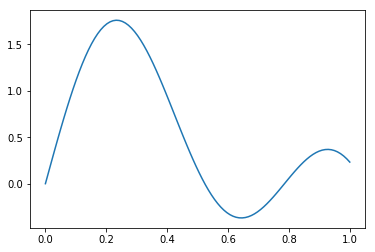

In [ ]:
plt.plot(xx, true_func(xx).detach())
plt.show()

In [ ]:
x = torch.rand(2)
y = true_func(x)

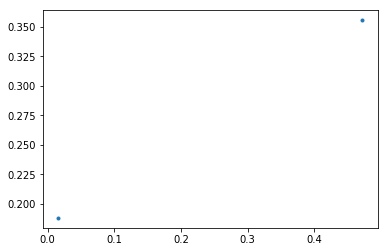

In [ ]:
plt.plot(x, y, linestyle="None", marker=".")
plt.show()

In [ ]:
bo = BayesOpt(x, y, max_x=1.)

In [ ]:
bo.train_surrogate(iters=200)

In [ ]:
bo.surrogate_lh.eval();
bo.surrogate.eval();

test_points = torch.linspace(0, 1., 1000).float()
test_dist = bo.surrogate_lh(bo.surrogate(test_points))

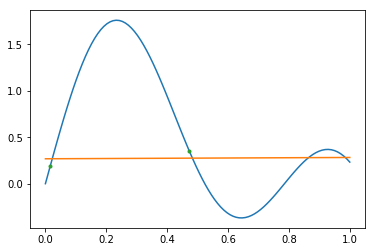

In [ ]:
plt.plot(xx, true_func(xx).detach())
plt.plot(test_points, test_dist.mean.detach())
plt.plot(x, y.detach(), marker='.', linestyle="None")
plt.show()


In [ ]:
bo.acquire()

tensor(1.)


tensor(1.)

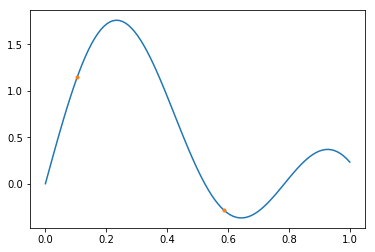

tensor(0.0651)
tensor([0.0651])


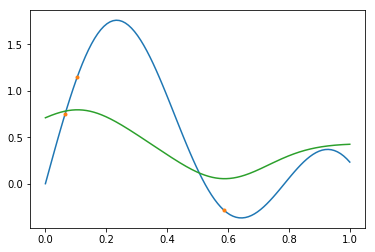

tensor(0.1942)
tensor([0.1942])


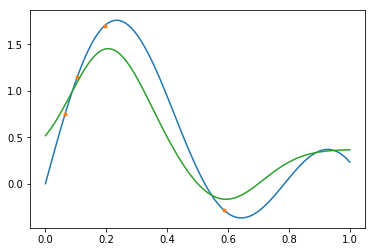

tensor(0.2242)
tensor([0.2242])


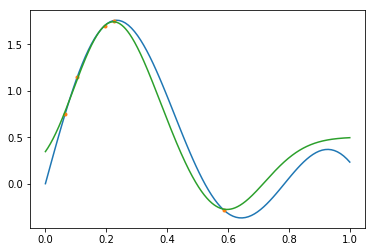

tensor(1.)
tensor([1.])


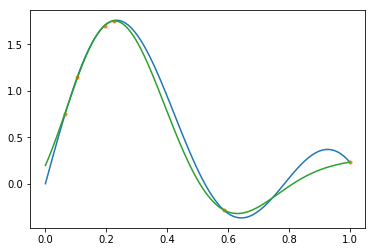

tensor(0.2272)
tensor([0.2272])


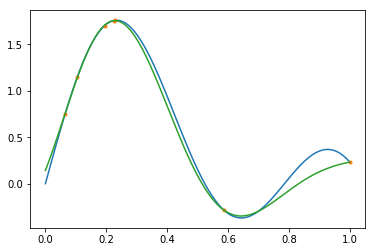

tensor(0.2302)
tensor([0.2302])


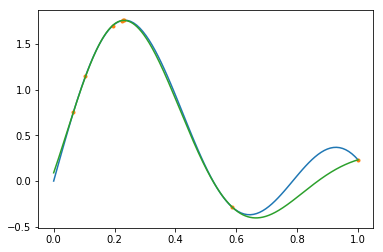

tensor(0.2312)
tensor([0.2312])


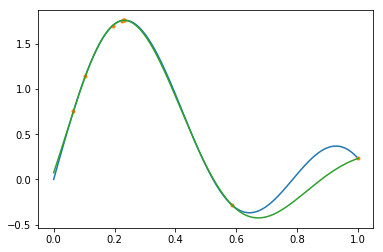

tensor(0.2322)
tensor([0.2322])


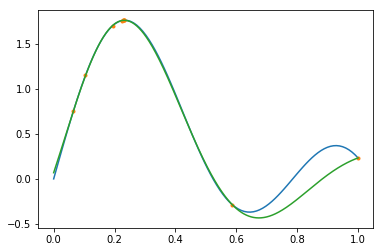

tensor(0.2322)
tensor([0.2322])


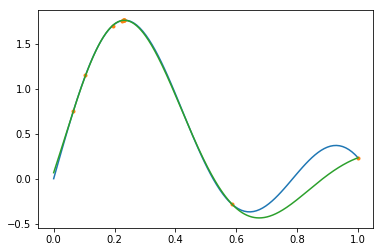

tensor(0.2322)
tensor([0.2322])


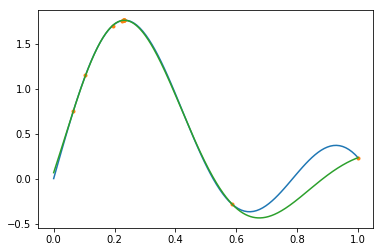

In [ ]:
rate = torch.rand(2)
rwrd = true_func(rate)
bo = BayesOpt(rate, rwrd, max_x=1.)

plt.plot(xx, true_func(xx).detach())
plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
plt.show()

rnds = 10

for ii in range(rnds):
    bo.train_surrogate(iters=200)
    next_rate = bo.acquire(explore=0.).unsqueeze(0)
    rwrd = true_func(next_rate)
    print(next_rate)
    bo.update_obs(next_rate, rwrd)
    
    bo.surrogate_lh.eval();
    bo.surrogate.eval();

    test_points = torch.linspace(0, 1., 1000).float()
    test_dist = bo.surrogate_lh(bo.surrogate(test_points))
    
    plt.plot(xx, true_func(xx).detach())
    plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
    plt.plot(test_points, test_dist.mean.detach())
    plt.show()

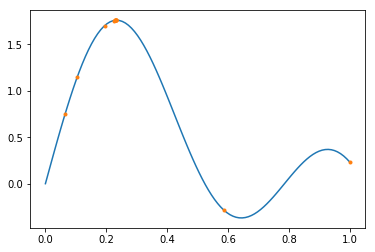

In [ ]:
plt.plot(xx, true_func(xx).detach())
plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
plt.show()